In [3]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from astroML.datasets import fetch_kepler_catalog
from astroML.density_estimation import KDE
from exodala import ExoplanetDataset


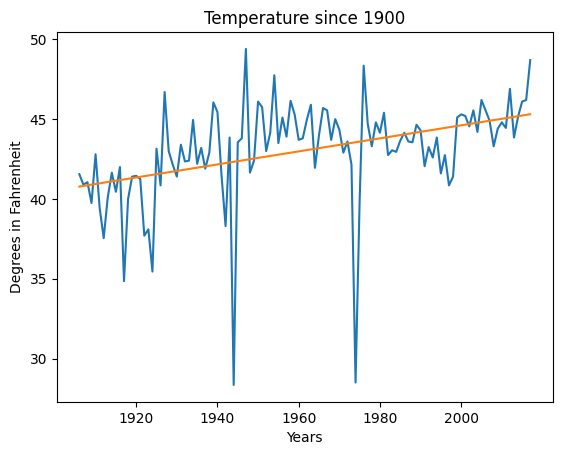

In [5]:

with open("/content/drive/MyDrive/Colab Notebooks/Datasets/weather.txt" ,'r') as data:
    read_data=data.readlines()

year=[]
maxtemp=[]
mintemp=[]
avtemp=[]

for i in read_data:
    year.append(float(i[0:4]))
    maxtemp.append(float(i[5:9]))
    mintemp.append(float(i[10:14]))
    avtemp.append((float(i[5:9])+float(i[10:14]))/2.0)

plt.title("Temperature since 1900")
plt.xlabel("Years")
plt.ylabel("Degrees in Fahrenheit")
plt.plot(year, avtemp)
plt.xticks(np.arange(1900, max(year), 20.0))
plt.plot(year, np.poly1d(np.polyfit(year, avtemp, 1))(year))
plt.show()


In [6]:
# Loading data
exoplanets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/exoplanet_dicsovery.csv", sep=',')
exoplanets


,discoverymethod,disc_year
0,Radial Velocity,2007
1,Radial Velocity,2009
2,Radial Velocity,2008
3,Radial Velocity,2002
4,Radial Velocity,1996
...,...,...
4384,Radial Velocity,2013
4385,Radial Velocity,1996
4386,Radial Velocity,1999
4387,Radial Velocity,1999


In [7]:
# Array of discovery methods
x = np.array(exoplanets["discoverymethod"])
discovery_types = np.unique(x)
discovery_types

array(['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations',
       'Imaging', 'Microlensing', 'Orbital Brightness Modulation',
       'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity',
       'Transit', 'Transit Timing Variations'], dtype=object)

In [8]:
# List of years
year_start = min(exoplanets["disc_year"])
year_end = max(exoplanets["disc_year"])
print(year_start, " - ", year_end)

1989  -  2021


In [9]:
# Make array of years and types
exoplanets_years = pd.DataFrame()
for year in range(year_start, year_end+1):
  discovery_type_list = []
  for index, discovery_type in enumerate(discovery_types):
    numPlanets = 0
    if year > year_start:
      # numplanets is the cumulative total.
      numPlanets = exoplanets_years.at[index,year-1]
    numPlanets += pd.Series.sum((exoplanets['disc_year'] == year) & (exoplanets['discoverymethod'] == discovery_type))
    discovery_type_list.append(numPlanets)
  exoplanets_years[year] = discovery_type_list
exoplanets_years.insert(0, "Discovery Type", discovery_types)

exoplanets_years

,Discovery Type,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Astrometry,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1,Disk Kinematics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,Eclipse Timing Variations,0,0,0,0,0,0,0,0,0,...,10,10,10,11,11,13,14,16,16,16
3,Imaging,0,0,0,0,0,0,0,0,0,...,27,34,36,41,43,44,45,49,51,52
4,Microlensing,0,0,0,0,0,0,0,0,0,...,20,25,31,35,45,54,75,89,107,108
5,Orbital Brightness Modulation,0,0,0,0,0,0,0,0,0,...,2,3,6,6,6,6,6,6,6,6
6,Pulsar Timing,0,0,0,2,2,3,3,3,3,...,5,5,5,5,5,7,7,7,7,7
7,Pulsation Timing Variations,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
8,Radial Velocity,1,1,1,1,1,1,2,8,9,...,444,476,526,573,622,670,718,785,826,842
9,Transit,0,0,0,0,0,0,0,0,0,...,280,359,1157,1257,2699,2789,3031,3139,3304,3333


In [10]:
exoplanets_years.to_csv(index=False)

'Discovery Type,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021\nAstrometry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1\nDisk Kinematics,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1\nEclipse Timing Variations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,8,10,10,10,11,11,13,14,16,16,16\nImaging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,8,9,16,17,23,25,27,34,36,41,43,44,45,49,51,52\nMicrolensing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,8,10,12,13,20,25,31,35,45,54,75,89,107,108\nOrbital Brightness Modulation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,6,6,6,6,6,6,6,6\nPulsar Timing,0,0,0,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,7,7,7,7,7\nPulsation Timing Variations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2\nRadial Velocity,1,1,1,1,1,1,2,8,9,15,28,44,56,84,105,123,156,177,211,249,322,363,410,444,476,526,

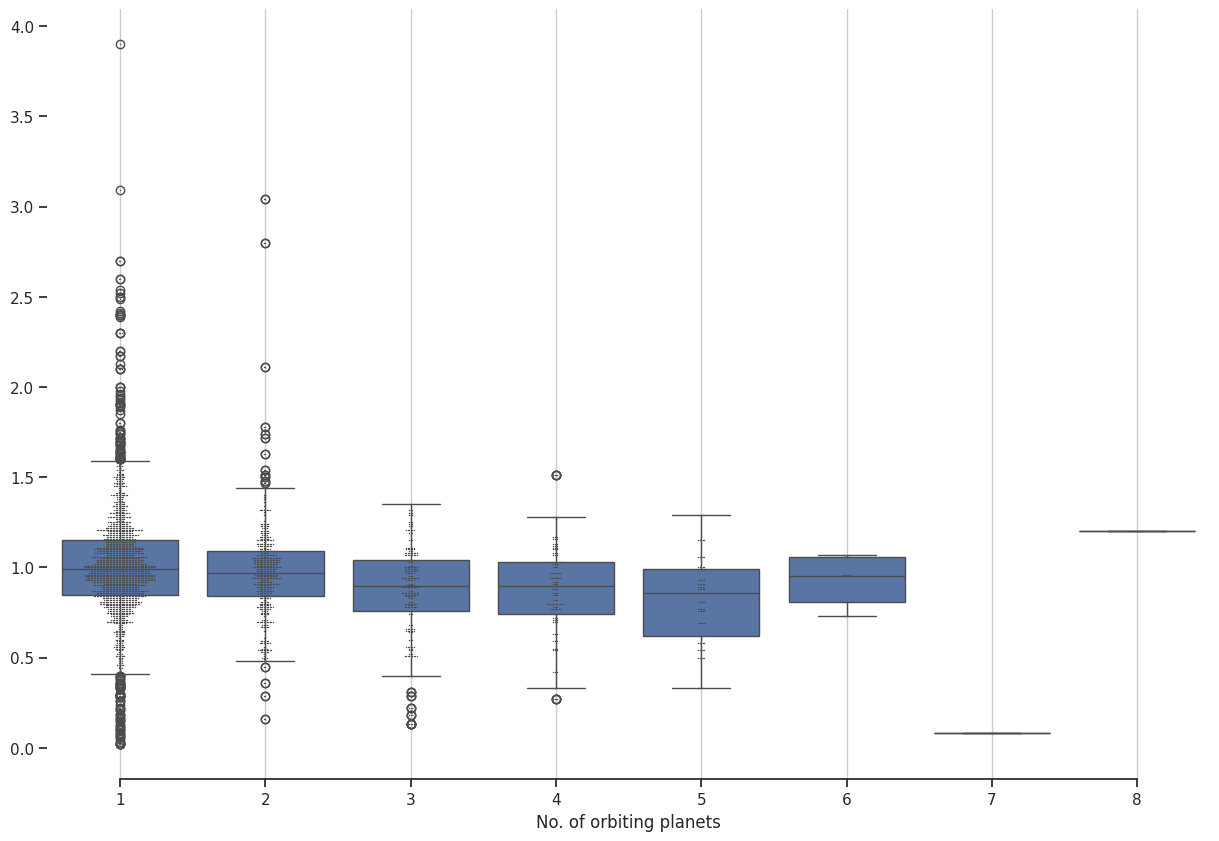

In [11]:

planets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/planets.csv", sep=',')
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("linear")

sns.boxplot(x="pl_pnum", y="st_mass", data=planets)


sns.swarmplot(x="pl_pnum", y="st_mass", data=planets, size=1, color=".3", linewidth=0)


plt.xlabel("No. of orbiting planets")
plt.ylabel("Solar masses of parent stars")

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


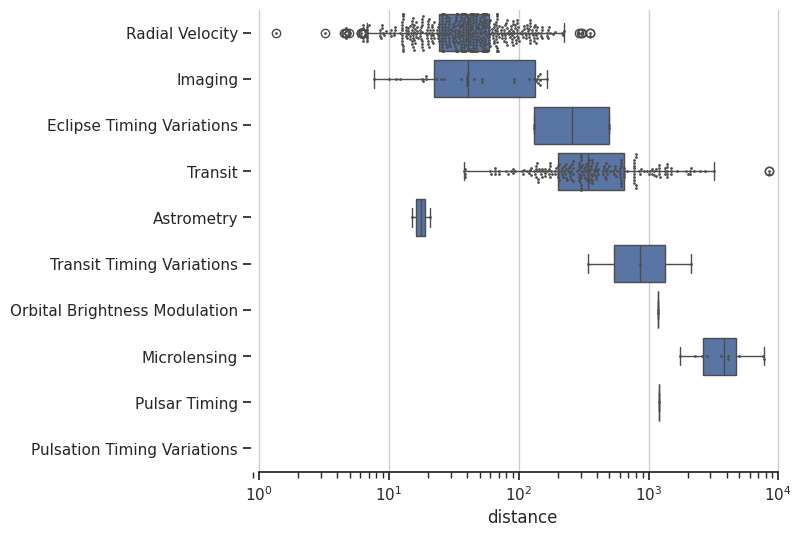

In [12]:
planets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/planets.csv", sep=',')
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

planets = sns.load_dataset("planets")

sns.boxplot(x="distance", y="method", data=planets)

sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [13]:
planets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/exoplanet_dicsovery.csv", sep=',')
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("linear")

sns.boxplot(x="disc_year", y="discoverymethod", data=planets)


sns.swarmplot(x="disc_year", y="discoverymethod", data=planets, size=1, color=".3", linewidth=0)

plt.xlabel("Discovery Year")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f505d2602c0> (for post_execute):


KeyboardInterrupt: 

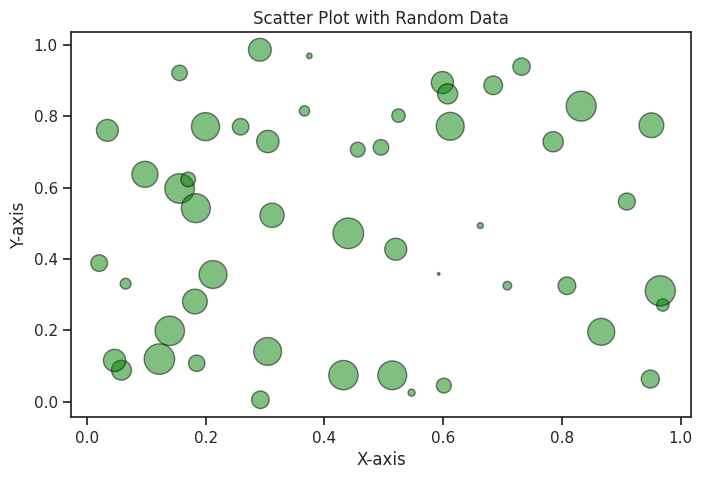

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
x = np.random.rand(50)
y = np.random.rand(50)
sizes = np.random.rand(50) * 500  # Random sizes

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=sizes, c='green', alpha=0.5, edgecolors='black')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Random Data')
plt.show()


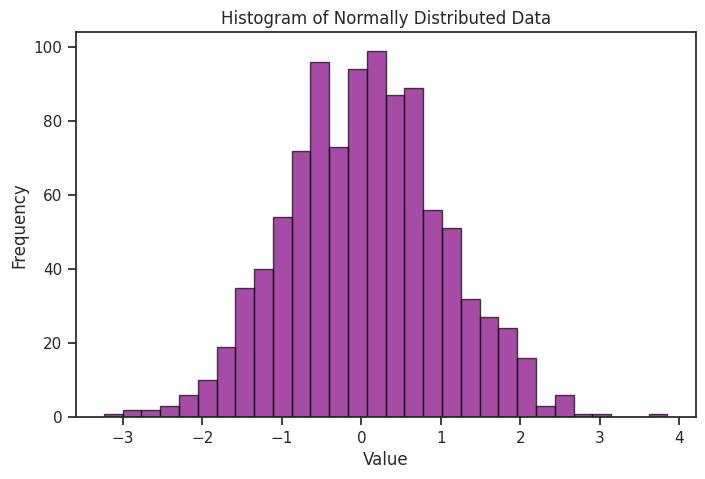

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random normal data
data = np.random.randn(1000)

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Normally Distributed Data')
plt.show()


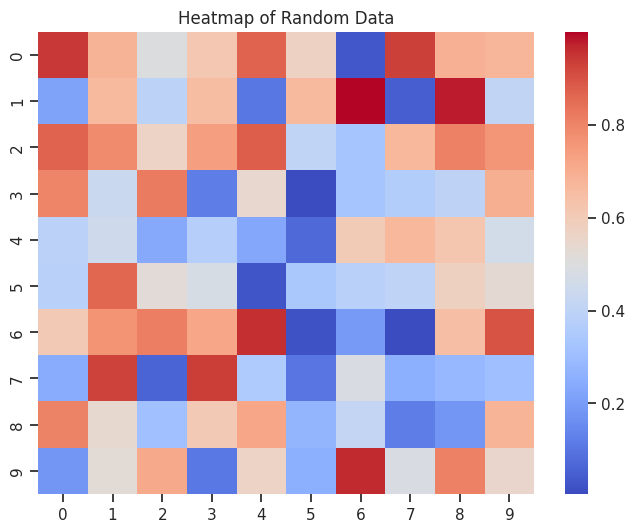

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(10, 10)

plt.figure(figsize=(8, 6))
sns.heatmap(data, cmap='coolwarm', annot=False)
plt.title('Heatmap of Random Data')
plt.show()


In [19]:

array1 = np.random.randint(1, 100, 10)
array2 = np.random.randint(1, 100, 10)


sum_arrays = array1 + array2
product_arrays = array1 * array2
mean_array = np.mean(array1)
std_array = np.std(array2)

# Print results
print("Array 1:", array1)
print("Array 2:", array2)
print("Sum:", sum_arrays)
print("Product:", product_arrays)
print("Mean of Array 1:", mean_array)
print("Standard Deviation of Array 2:", std_array)


Array 1: [45 47 13 22 21 86 92  9 26  9]
Array 2: [15 10 88 42 72 24 80 49 26 91]
Sum: [ 60  57 101  64  93 110 172  58  52 100]
Product: [ 675  470 1144  924 1512 2064 7360  441  676  819]
Mean of Array 1: 37.0
Standard Deviation of Array 2: 29.411052344314374


In [ ]:
# Load Exoplanet Dataset
exoplanet_data = ExoplanetDataset('/content/drive/MyDrive/Colab Notebooks/Datasets/exoplanet_dicsovery.csv')


kepler_data = fetch_kepler_catalog()
kde = KDE(kernel='epanechnikov', bw='silverman')
kde.fit(kepler_data['log_teff'])

plt.figure(figsize=(10, 6))
kde.plot()
plt.title("KDE of Log Temperature of Kepler Stars")
plt.xlabel("Log Temperature (Kelvin)")
plt.ylabel("Density")
plt.show()


exoplanet_data.plot_discovery_method_time()
plt.title('Exoplanet Discovery Methods Over Time')
plt.xlabel('Year')
plt.ylabel('Discovery Method')
plt.show()


method = 'Transit'
discovered_planets = exoplanet_data.query_discovery_method(method)
print(f"Number of exoplanets discovered by {method}: {len(discovered_planets)}")